In [16]:
# vanilla

import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# One-hot encoded input and target sequences for the word "hello"
input_sequence = [
    [1, 0, 0, 0],  # h
    [0, 1, 0, 0],  # e
    [0, 0, 1, 0],  # l
    [0, 0, 1, 0]   # l
]

target_sequence = [
    [0, 1, 0, 0],  # e (target for h)
    [0, 0, 1, 0],  # l (target for e)
    [0, 0, 1, 0],  # l (target for l)
    [0, 0, 0, 1]   # o (target for l)
]

# Create a dictionary to map one-hot vectors to letters
idx_to_char = {
    str([1, 0, 0, 0]): 'h',
    str([0, 1, 0, 0]): 'e',
    str([0, 0, 1, 0]): 'l',
    str([0, 0, 0, 1]): 'o'
}

# Initialize RNN parameters
h_size = 7
W_hx = np.random.randn(4, h_size)  # input to hidden
W_yh = np.random.randn(h_size, 4)  # hidden to output
W_hh = np.random.randn(h_size, h_size)  # hidden to hidden
b_h = np.zeros(h_size)  # hidden layer bias
b_y = np.zeros(4)       # output layer bias

learning_rate = 0.01
epochs = 100

# Define helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum()


# Training loop
for epoch in range(epochs):
    total_loss = 0
    h = np.zeros(h_size)  # initialize hidden state for each epoch
    
    # Gradients initialization for accumulating over timesteps
    dW_hx = np.zeros_like(W_hx)
    dW_hh = np.zeros_like(W_hh)
    dW_yh = np.zeros_like(W_yh)
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)
    dh_next = np.zeros_like(h)
    
    # Forward and backward pass for each timestep
    for i in range(len(input_sequence)):
        x = np.array(input_sequence[i])
        y = np.array(target_sequence[i])
        
        # Forward pass
        a = np.dot(x, W_hx) + np.dot(h, W_hh) + b_h
        h = np.tanh(a)
        z = np.dot(h, W_yh) + b_y
        y_hat = softmax(z)
        
        # Calculate loss
        loss = -np.sum(y * np.log(y_hat + 1e-7))
        total_loss += loss

        # Backpropagation
        dy = y_hat - y  # derivative of cross-entropy loss w.r.t output
        dW_yh += np.outer(h, dy)
        db_y += dy

        dh = np.dot(W_yh, dy) + dh_next  # gradient for hidden state
        db = (1 - h ** 2) * dh           # backprop through tanh activation

        dW_hx += np.outer(x, db)
        dW_hh += np.outer(h, db)
        db_h += db
        
        # Pass the gradient to the next timestep
        dh_next = np.dot(W_hh, db)
        
    
    # Clip gradients to prevent exploding gradients
    for dparam in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
        np.clip(dparam, -1, 1, out=dparam)

    # Update parameters
    W_hx -= learning_rate * dW_hx
    W_hh -= learning_rate * dW_hh
    W_yh -= learning_rate * dW_yh
    b_h -= learning_rate * db_h
    b_y -= learning_rate * db_y

    # Print total loss and outcome for this epoch
    print(f"\nEpoch {epoch + 1}/{epochs}, Total Loss: {total_loss:.3f}")
    print("Predicted sequence:")

    # Forward pass through the sequence to print predictions
    h = np.zeros(h_size)  # reset hidden state for prediction
    for i in range(len(input_sequence)):
        x = np.array(input_sequence[i])
        b = np.dot(x, W_hx) + np.dot(h, W_hh) + b_h
        h = np.tanh(b)
        a = np.dot(h, W_yh) + b_y
        output = softmax(a)
        
        # Find the character with the highest probability
        predicted_char = max(idx_to_char, key=lambda k: output[int(k.strip('[]').split(', ').index('1'))])
        print(f"  Step {i+1}: '{predicted_char}' with probabilities {output.round(3)}")



Epoch 1/100, Total Loss: 9.730
Predicted sequence:
  Step 1: '[0, 0, 0, 1]' with probabilities [0.148 0.16  0.096 0.595]
  Step 2: '[1, 0, 0, 0]' with probabilities [0.657 0.122 0.211 0.011]
  Step 3: '[0, 1, 0, 0]' with probabilities [0.002 0.826 0.049 0.123]
  Step 4: '[0, 1, 0, 0]' with probabilities [0.002 0.912 0.037 0.05 ]

Epoch 2/100, Total Loss: 9.417
Predicted sequence:
  Step 1: '[0, 0, 0, 1]' with probabilities [0.148 0.168 0.096 0.587]
  Step 2: '[1, 0, 0, 0]' with probabilities [0.642 0.133 0.214 0.011]
  Step 3: '[0, 1, 0, 0]' with probabilities [0.002 0.81  0.051 0.136]
  Step 4: '[0, 1, 0, 0]' with probabilities [0.002 0.898 0.04  0.06 ]

Epoch 3/100, Total Loss: 9.109
Predicted sequence:
  Step 1: '[0, 0, 0, 1]' with probabilities [0.148 0.176 0.096 0.579]
  Step 2: '[1, 0, 0, 0]' with probabilities [0.627 0.144 0.217 0.012]
  Step 3: '[0, 1, 0, 0]' with probabilities [0.002 0.793 0.054 0.15 ]
  Step 4: '[0, 1, 0, 0]' with probabilities [0.002 0.881 0.044 0.072]

Epo

In [4]:
# vanilla

import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# One-hot encoded input and target sequences for the word "hello"
input_sequence = [
    [1, 0, 0, 0],  # h
    [0, 1, 0, 0],  # e
    [0, 0, 1, 0],  # l
    [0, 0, 1, 0]   # l
]

target_sequence = [
    [0, 1, 0, 0],  # e (target for h)
    [0, 0, 1, 0],  # l (target for e)
    [0, 0, 1, 0],  # l (target for l)
    [0, 0, 0, 1]   # o (target for l)
]

# Create a dictionary to map one-hot vectors to letters
idx_to_char = {
    str([1, 0, 0, 0]): 'h',
    str([0, 1, 0, 0]): 'e',
    str([0, 0, 1, 0]): 'l',
    str([0, 0, 0, 1]): 'o'
}

# Initialize RNN parameters
h_size = 7
W_hx = np.random.randn(h_size, 4)  # input to hidden
W_yh = np.random.randn(4, h_size)  # hidden to output
W_hh = np.random.randn(h_size, h_size)  # hidden to hidden
b_h = np.zeros(h_size)  # hidden layer bias
b_y = np.zeros(4)       # output layer bias

learning_rate = 0.01
epochs = 100

# Define helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum()


# Training loop
for epoch in range(epochs):
    total_loss = 0
    h = np.zeros(h_size)  # initialize hidden state for each epoch
    
    # Gradients initialization for accumulating over timesteps
    dW_hx = np.zeros_like(W_hx)
    dW_hh = np.zeros_like(W_hh)
    dW_yh = np.zeros_like(W_yh)
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)
    dh_next = np.zeros_like(h)
    
    # Forward and backward pass for each timestep
    for i in range(len(input_sequence)):
        x = np.array(input_sequence[i])
        y = np.array(target_sequence[i])
        
        # Forward pass
        a = np.dot(W_hx, x) + np.dot(h, W_hh) + b_h
        h = np.tanh(a)
        z = np.dot(W_yh, h) + b_y
        y_hat = softmax(z)
        
        # Calculate loss
        loss = -np.sum(y * np.log(y_hat + 1e-7))
        total_loss += loss

        # Backpropagation
        dy = y_hat - y  # derivative of cross-entropy loss w.r.t output
        dW_yh += np.outer(dy, h)
        db_y += dy

        dh = np.dot(dy, W_yh) + dh_next  # gradient for hidden state
        db = (1 - h ** 2) * dh           # backprop through tanh activation
        
        dW_hx += np.outer(db, x)
        dW_hh += np.outer(db, h)
        db_h += db
        
        # Pass the gradient to the next timestep
        dh_next = np.dot(W_hh, db)
        
    
    # Clip gradients to prevent exploding gradients
    for dparam in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
        np.clip(dparam, -1, 1, out=dparam)

    # Update parameters
    W_hx -= learning_rate * dW_hx
    W_hh -= learning_rate * dW_hh
    W_yh -= learning_rate * dW_yh
    b_h -= learning_rate * db_h
    b_y -= learning_rate * db_y

    # Print total loss and outcome for this epoch
    print(f"\nEpoch {epoch + 1}/{epochs}, Total Loss: {total_loss:.3f}")
    print("Predicted sequence:")

    # Forward pass through the sequence to print predictions
    h = np.zeros(h_size)  # reset hidden state for prediction
    for i in range(len(input_sequence)):
        x = np.array(input_sequence[i])
        a = np.dot(W_hx, x) + np.dot(h, W_hh) + b_h
        h = np.tanh(a)
        z = np.dot(W_yh, h) + b_y
        output = softmax(z)
        
        # Find the character with the highest probability
        predicted_char = max(idx_to_char, key=lambda k: output[int(k.strip('[]').split(', ').index('1'))])
        print(f"  Step {i+1}: '{predicted_char}' with probabilities {output.round(3)}")



Epoch 1/100, Total Loss: 6.553
Predicted sequence:
  Step 1: '[0, 0, 1, 0]' with probabilities [0.055 0.204 0.684 0.057]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.03  0.394 0.506 0.069]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.292 0.185 0.436 0.087]
  Step 4: '[1, 0, 0, 0]' with probabilities [0.868 0.024 0.068 0.041]

Epoch 2/100, Total Loss: 6.305
Predicted sequence:
  Step 1: '[0, 0, 1, 0]' with probabilities [0.052 0.212 0.678 0.058]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.033 0.388 0.511 0.068]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.274 0.189 0.446 0.091]
  Step 4: '[1, 0, 0, 0]' with probabilities [0.846 0.028 0.078 0.048]

Epoch 3/100, Total Loss: 6.056
Predicted sequence:
  Step 1: '[0, 0, 1, 0]' with probabilities [0.049 0.221 0.671 0.059]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.035 0.381 0.517 0.067]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.257 0.194 0.454 0.095]
  Step 4: '[1, 0, 0, 0]' with probabilities [0.819 0.032 0.09  0.058]

Epo

In [1]:
# vanilla

import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# One-hot encoded input and target sequences for the word "hello"
input_sequence = [
    [1, 0, 0, 0],  # h
    [0, 1, 0, 0],  # e
    [0, 0, 1, 0],  # l
    [0, 0, 1, 0]   # l
]

target_sequence = [
    [0, 1, 0, 0],  # e (target for h)
    [0, 0, 1, 0],  # l (target for e)
    [0, 0, 1, 0],  # l (target for l)
    [0, 0, 0, 1]   # o (target for l)
]

# Create a dictionary to map one-hot vectors to letters
idx_to_char = {
    str([1, 0, 0, 0]): 'h',
    str([0, 1, 0, 0]): 'e',
    str([0, 0, 1, 0]): 'l',
    str([0, 0, 0, 1]): 'o'
}

# Initialize RNN parameters
h_size = 7
W_hx = np.random.randn(h_size, 4)  # input to hidden
W_yh = np.random.randn(4, h_size)  # hidden to output
W_hh = np.random.randn(h_size, h_size)  # hidden to hidden
b_h = np.zeros(h_size)  # hidden layer bias
b_y = np.zeros(4)       # output layer bias

learning_rate = 0.01
epochs = 100

# Define helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum()


# Training loop
for epoch in range(epochs):
    total_loss = 0
    h = np.zeros(h_size)  # initialize hidden state for each epoch
    
    # Gradients initialization for accumulating over timesteps
    dW_hx = np.zeros_like(W_hx)
    dW_hh = np.zeros_like(W_hh)
    dW_yh = np.zeros_like(W_yh)
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)
    dh_next = np.zeros_like(h)
    
    # Forward and backward pass for each timestep
    for i in range(len(input_sequence)):
        x = np.array(input_sequence[i])
        y = np.array(target_sequence[i])
        
        # Forward pass
        a = np.dot(W_hx, x) + np.dot(h, W_hh) + b_h
        h = np.tanh(a)
        z = np.dot(W_yh, h) + b_y
        y_hat = softmax(z)
        
        # Calculate loss
        loss = -np.sum(y * np.log(y_hat + 1e-7))
        total_loss += loss

        # Backpropagation
        dy = y_hat - y  # derivative of cross-entropy loss w.r.t output
        dW_yh += np.outer(dy, h)
        db_y += dy

        dh = np.dot(dy, W_yh) + dh_next  # gradient for hidden state
        da = (1 - h ** 2) * dh           # backprop through tanh activation
        
        dW_hx += np.outer(da, x)
        dW_hh += np.outer(da, h)
        db_h += da
        
        # Pass the gradient to the next timestep
        dh_next = np.dot(W_hh, da)
        
    
    # Clip gradients to prevent exploding gradients
    for dparam in [dW_hx, dW_hh, dW_yh, db_h, db_y]:
        np.clip(dparam, -1, 1, out=dparam)

    # Update parameters
    W_hx -= learning_rate * dW_hx
    W_hh -= learning_rate * dW_hh
    W_yh -= learning_rate * dW_yh
    b_h -= learning_rate * db_h
    b_y -= learning_rate * db_y
    # Print results for epochs that are multiples of 20
    if (epoch + 1) % 20 == 0:
        print(f"\nEpoch {epoch + 1}/{epochs}, Total Loss: {total_loss:.3f}")
        print("Predicted sequence:")

        # Forward pass through the sequence to print predictions
        h = np.zeros(h_size)  # reset hidden state for prediction
        for i in range(len(input_sequence)):
            x = np.array(input_sequence[i])
            a = np.dot(W_hx, x) + np.dot(h, W_hh) + b_h
            h = np.tanh(a)
            z = np.dot(W_yh, h) + b_y
            output = softmax(z)
            
            # Find the character with the highest probability
            predicted_char = max(idx_to_char, key=lambda k: output[int(k.strip('[]').split(', ').index('1'))])
            print(f"  Step {i+1}: '{predicted_char}' with probabilities {output.round(3)}")



Epoch 20/100, Total Loss: 3.110
Predicted sequence:
  Step 1: '[0, 0, 1, 0]' with probabilities [0.023 0.39  0.52  0.068]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.079 0.217 0.65  0.053]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.108 0.228 0.534 0.13 ]
  Step 4: '[0, 0, 0, 1]' with probabilities [0.171 0.143 0.325 0.36 ]

Epoch 40/100, Total Loss: 2.005
Predicted sequence:
  Step 1: '[0, 1, 0, 0]' with probabilities [0.012 0.561 0.364 0.063]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.083 0.109 0.759 0.049]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.068 0.186 0.642 0.103]
  Step 4: '[0, 0, 0, 1]' with probabilities [0.066 0.111 0.314 0.509]

Epoch 60/100, Total Loss: 1.536
Predicted sequence:
  Step 1: '[0, 1, 0, 0]' with probabilities [0.009 0.672 0.264 0.055]
  Step 2: '[0, 0, 1, 0]' with probabilities [0.068 0.07  0.814 0.048]
  Step 3: '[0, 0, 1, 0]' with probabilities [0.052 0.142 0.717 0.089]
  Step 4: '[0, 0, 0, 1]' with probabilities [0.051 0.08  0.311 0.558]



In [14]:
print(dz.shape)
print(dh.shape)
#print(np.dot(dy, W_yh.shape))

(7,)
(7,)


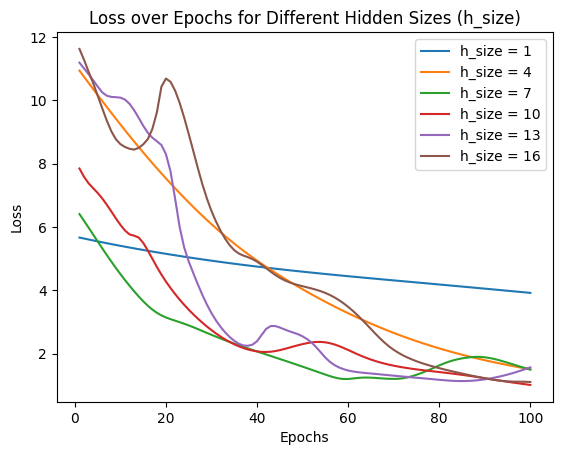

In [6]:
#record relationship between different h_size 
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# One-hot encoded input and target sequences for the word "hello"
input_sequence = [
    [1, 0, 0, 0],  # h
    [0, 1, 0, 0],  # e
    [0, 0, 1, 0],  # l
    [0, 0, 1, 0]   # l
]

target_sequence = [
    [0, 1, 0, 0],  # e (target for h)
    [0, 0, 1, 0],  # l (target for e)
    [0, 0, 1, 0],  # l (target for l)
    [0, 0, 0, 1]   # o (target for l)
]

# Create a dictionary to map one-hot vectors to letters
idx_to_char = {
    str([1, 0, 0, 0]): 'h',
    str([0, 1, 0, 0]): 'e',
    str([0, 0, 1, 0]): 'l',
    str([0, 0, 0, 1]): 'o'
}

learning_rate = 0.01
epochs = 100

# Define helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum()

# Track losses for each h_size
h_size_values = range(1, 17, 3)
loss_records = {}

# Loop over different h_size values
for h_size in h_size_values:
    # Initialize RNN parameters for each h_size
    W_xh = np.random.randn(4, h_size)  # input to hidden
    W_hy = np.random.randn(h_size, 4)  # hidden to output
    W_hh = np.random.randn(h_size, h_size)  # hidden to hidden
    b_h = np.zeros(h_size)  # hidden layer bias
    b_y = np.zeros(4)       # output layer bias

    # Track losses for this h_size
    epoch_losses = []

    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        h = np.zeros(h_size)  # initialize hidden state for each epoch

        # Gradients initialization for accumulating over timesteps
        dW_xh = np.zeros_like(W_xh)
        dW_hh = np.zeros_like(W_hh)
        dW_hy = np.zeros_like(W_hy)
        db_h = np.zeros_like(b_h)
        db_y = np.zeros_like(b_y)
        dh_next = np.zeros_like(h)

        # Forward and backward pass for each timestep
        for i in range(len(input_sequence)):
            x = np.array(input_sequence[i])
            target = np.array(target_sequence[i])

            # Forward pass
            b = np.dot(x, W_xh) + np.dot(h, W_hh) + b_h
            h = np.tanh(b)
            a = np.dot(h, W_hy) + b_y
            output = softmax(a)

            # Calculate loss
            loss = -np.sum(target * np.log(output + 1e-7))
            total_loss += loss

            # Backpropagation
            dy = output - target  # derivative of cross-entropy loss w.r.t output
            dW_hy += np.outer(h, dy)
            db_y += dy

            dh = np.dot(W_hy, dy) + dh_next  # gradient for hidden state
            db = (1 - h ** 2) * dh           # backprop through tanh activation

            dW_xh += np.outer(x, db)
            dW_hh += np.outer(h, db)
            db_h += db

            # Pass the gradient to the next timestep
            dh_next = np.dot(W_hh, db)

        # Clip gradients to prevent exploding gradients
        for dparam in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update parameters
        W_xh -= learning_rate * dW_xh
        W_hh -= learning_rate * dW_hh
        W_hy -= learning_rate * dW_hy
        b_h -= learning_rate * db_h
        b_y -= learning_rate * db_y

        # Record the total loss for this epoch
        epoch_losses.append(total_loss)

    # Store the loss for this h_size in the dictionary
    loss_records[h_size] = epoch_losses

# Plot the loss over epochs for each h_size
for h_size, losses in loss_records.items():
    plt.plot(range(1, epochs + 1), losses, label=f"h_size = {h_size}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs for Different Hidden Sizes (h_size)")
plt.legend()
plt.show()


should be able to train a multilayer RNN too

In [ ]:
#record relationship between different h_size 
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# One-hot encoded input and target sequences for the word "hello"
input_sequence = [
    [1, 0, 0, 0],  # h
    [0, 1, 0, 0],  # e
    [0, 0, 1, 0],  # l
    [0, 0, 1, 0]   # l
]

target_sequence = [
    [0, 1, 0, 0],  # e (target for h)
    [0, 0, 1, 0],  # l (target for e)
    [0, 0, 1, 0],  # l (target for l)
    [0, 0, 0, 1]   # o (target for l)
]

# Create a dictionary to map one-hot vectors to letters
idx_to_char = {
    str([1, 0, 0, 0]): 'h',
    str([0, 1, 0, 0]): 'e',
    str([0, 0, 1, 0]): 'l',
    str([0, 0, 0, 1]): 'o'
}

learning_rate = 0.01
epochs = 100

# Define helper functions
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # numerical stability
    return exp_x / exp_x.sum()

# Track losses for each h_size
h_size_values = range(1, 17, 3)
loss_records = {}

# Loop over different h_size values
for h_size in h_size_values:
    # Initialize RNN parameters for each h_size
    W_xh = np.random.randn(4, h_size)  # input to hidden
    W_hy = np.random.randn(h_size, 4)  # hidden to output
    W_hh = np.random.randn(h_size, h_size)  # hidden to hidden
    b_h = np.zeros(h_size)  # hidden layer bias
    b_y = np.zeros(4)       # output layer bias

    # Track losses for this h_size
    epoch_losses = []

    # Training loop
    for epoch in range(epochs):
        total_loss = 0
        h = np.zeros(h_size)  # initialize hidden state for each epoch

        # Gradients initialization for accumulating over timesteps
        dW_xh = np.zeros_like(W_xh)
        dW_hh = np.zeros_like(W_hh)
        dW_hy = np.zeros_like(W_hy)
        db_h = np.zeros_like(b_h)
        db_y = np.zeros_like(b_y)
        dh_next = np.zeros_like(h)

        # Forward and backward pass for each timestep
        for i in range(len(input_sequence)):
            x = np.array(input_sequence[i])
            target = np.array(target_sequence[i])

            # Forward pass
            b = np.dot(x, W_xh) + np.dot(h, W_hh) + b_h
            h = np.tanh(b)
            a = np.dot(h, W_hy) + b_y
            output = softmax(a)

            # Calculate loss
            loss = -np.sum(target * np.log(output + 1e-7))
            total_loss += loss

            # Backpropagation
            dy = output - target  # derivative of cross-entropy loss w.r.t output
            dW_hy += np.outer(h, dy)
            db_y += dy

            dh = np.dot(W_hy, dy) + dh_next  # gradient for hidden state
            db = (1 - h ** 2) * dh           # backprop through tanh activation

            dW_xh += np.outer(x, db)
            dW_hh += np.outer(h, db)
            db_h += db

            # Pass the gradient to the next timestep
            dh_next = np.dot(W_hh, db)

        # Clip gradients to prevent exploding gradients
        for dparam in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update parameters
        W_xh -= learning_rate * dW_xh
        W_hh -= learning_rate * dW_hh
        W_hy -= learning_rate * dW_hy
        b_h -= learning_rate * db_h
        b_y -= learning_rate * db_y

        # Record the total loss for this epoch
        epoch_losses.append(total_loss)

    # Store the loss for this h_size in the dictionary
    loss_records[h_size] = epoch_losses

# Plot the loss over epochs for each h_size
for h_size, losses in loss_records.items():
    plt.plot(range(1, epochs + 1), losses, label=f"h_size = {h_size}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs for Different Hidden Sizes (h_size)")
plt.legend()
plt.show()


ValueError: shapes (7,4) and (7,) not aligned: 4 (dim 1) != 7 (dim 0)